In [3]:
import warnings
warnings.filterwarnings('ignore')
import picaso.justdoit as jdi
import astropy.units as u
import numpy as np
import tracemalloc
import time
import matplotlib.pyplot as plt






In [4]:
mh = '+0.0'
CtoO = '1.0'

filename_db="/Users/sagnickmukherjee/Documents/GitHub/picaso/reference/opacities/ck_cx_cont_opacities.db"
#filename_db="/Users/sagnickmukherjee/Documents/GitHub/Disequilibrium-Picaso/reference/climate_INPUTS/ck_cx_cont_opacities_661.db"
ck_db='/Users/sagnickmukherjee/Documents/software/picaso-dev/reference/opacities/ck_db/m'+mh+'_co'+CtoO+'.data.196'
#ck_db='/Users/sagnickmukherjee/Documents/software/picaso-dev/reference/opacities/ck_db/sonora_2020_feh+000_co_100.data.196'

opacity_ck = jdi.opannection(ck=True, ck_db=ck_db,filename_db=filename_db)#, deq = True, first_deq = True)


In [5]:
# planet prop
semi_major = 0.1#0.0355 #"NA" # AU
T_eff = 300
grav = 25
r_planet = 1.00 # needed for vulcan photochem runs

### star prop
T_star = 6000.0#"NA"
logg = 4.4
metal = 0.0
r_star = 1.0

self_consistent_kzz= False


nlevel = 91
pressure=np.logspace(np.log10(1e-5),np.log10(1000.0),nlevel)
temp_guess = np.zeros(shape=(nlevel)) 
kz = np.zeros(shape =(nlevel))

for i in range(len(temp_guess)):
    temp_guess[i] = 700
    kz[i] = 1e9
    

nofczns = 1
nstr = np.array([0,87,89,0,0,0])
rfacv = 0.5
rfaci =1.0
cloudy = False
fsed = 2
if cloudy == True:
    semi_major = str(semi_major)+"_cld_fsed"+str(fsed)



In [6]:
###### run start

cl_run = jdi.inputs(calculation="planet", climate = True)

cl_run.star(opacity_ck, temp =T_star,metal =metal, logg =logg, radius = r_star, radius_unit=u.R_sun,semi_major= semi_major , semi_major_unit = u.AU)#opacity db, pysynphot database, temp, metallicity, logg

cl_run.gravity(gravity=grav, gravity_unit=u.Unit('m/(s**2)'))
cl_run.T_eff(Teff=T_eff)





cl_run.inputs_climate(temp_guess= temp_guess, pressure= pressure, nstr = nstr, nofczns = nofczns , rfacv = rfacv, rfaci = rfaci, cloudy = cloudy, mh = mh, CtoO = CtoO,species = ['MgSiO3','Mg2SiO4','Fe'], fsed = fsed, T_star = T_star, logg = logg, metal = metal, r_star = r_star, semi_major = semi_major)


t0 = time.time()
pressure , temp, dtdp, nstr_new, flux_plus_final,quench_levels, df, all_profiles, all_kzz = cl_run.run_climate_model(opacity_ck,save_all_profiles=True, save_all_kzz = True,diseq_chem = True, self_consistent_kzz =self_consistent_kzz, kz = kz,vulcan_run = False)
t1 = time.time()
print(t1-t0)


Iteration number  0 , min , max temp  699.9781605313502 970.8993310661459 , flux balance  -22.15916761032016
Iteration number  1 , min , max temp  699.872881718884 1333.8176017909816 , flux balance  -22.13693913478119
Iteration number  2 , min , max temp  698.8206545097578 1874.0380401143846 , flux balance  -21.85280640804535
Iteration number  3 , min , max temp  688.3378850963759 2060.455445763364 , flux balance  -15.484425339835417
Iteration number  4 , min , max temp  661.0078158185634 2231.4292812082326 , flux balance  -9.971933604596597
Iteration number  5 , min , max temp  577.6072605806396 2411.362294863155 , flux balance  4.833729769161007
Iteration number  6 , min , max temp  556.042000726014 2372.2039823097202 , flux balance  0.2868147515019498
Iteration number  7 , min , max temp  554.6837865058238 2369.3309576900356 , flux balance  0.001520505815381079
Converged Solution in iterations  7
Big iteration is  554.6837865058238 0
Iteration number  0 , min , max temp  556.5097496

Iteration number  2 , min , max temp  586.1256161544271 3795.7972257683914 , flux balance  5.735884058809525e-05
Converged Solution in iterations  2
Quench Levels are CO, CO2, NH3, HCN  [70 50 73 68]
Big iteration is  586.1256161544271 0
Iteration number  0 , min , max temp  584.9157300953941 4046.6707390111783 , flux balance  0.06643240780996196
Iteration number  1 , min , max temp  584.9168482012815 4022.0244570928608 , flux balance  3.9836870414588254e-05
Iteration number  2 , min , max temp  584.9168525463733 4021.7543557816607 , flux balance  6.028771667666052e-09
Converged Solution in iterations  2
Quench Levels are CO, CO2, NH3, HCN  [70 51 73 68]
Big iteration is  584.9168525463733 1
Iteration number  0 , min , max temp  584.9055934271883 4113.408441184679 , flux balance  0.00425242387384746
Iteration number  1 , min , max temp  584.9061617661292 4109.955241640145 , flux balance  8.887776878734254e-07
Converged Solution in iterations  1
Quench Levels are CO, CO2, NH3, HCN  [70 

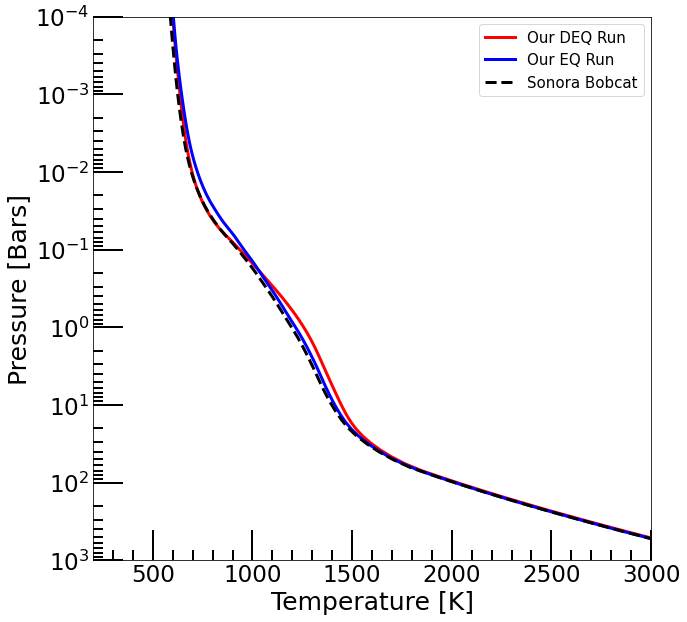

In [10]:
pressure_bobcat,temp_bobcat = np.loadtxt("Benchmarking/vanilla_0.1.dat",usecols=[1,2],unpack=True, skiprows = 1)


pres1,temp1 = np.loadtxt("Benchmarking/eq_planet",usecols=[0,1],unpack=True)
plt.figure(figsize=(10,10))
plt.ylabel("Pressure [Bars]", fontsize=25)
plt.xlabel('Temperature [K]', fontsize=25)
plt.ylim(1e3,1e-4)
plt.xlim(200,3000)

plt.semilogy(temp,pressure,color="r",linewidth=3,label="Our DEQ Run")
plt.semilogy(temp1,pres1,color="b",linewidth=3,label="Our EQ Run")
plt.semilogy(temp_bobcat,pressure_bobcat,color="k",linestyle="--",linewidth=3,label="Sonora Bobcat")


plt.minorticks_on()
plt.tick_params(axis='both',which='major',length =30, width=2,direction='in',labelsize=23)
plt.tick_params(axis='both',which='minor',length =10, width=2,direction='in',labelsize=23)

plt.legend(fontsize=15)

#plt.title(r"T$_{\rm eff}$= 1000 K, log(g)=5.0",fontsize=25)


In [12]:
np.savetxt("Benchmarking/deq_planet",np.transpose([pressure,temp]))
df.to_csv("Benchmarking/deq_planet_df",sep='\t')